Group Members:
Muhammad Mustafa
Zunaira Zunaira
Zalfa Mohayyudin

## Problem Sheet 02

In [ ]:
# Import require libaries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

## **Exercise 1.1**

In [37]:
#import data
df1= pd.read_csv("data_sin.csv")
df1.head()

,x,y
0,0.00,0.226454
1,0.02,0.244903
2,0.04,0.420218
3,0.06,0.273669
4,0.08,0.383952


In [ ]:
# dimension of data
df1.shape

(50, 2)

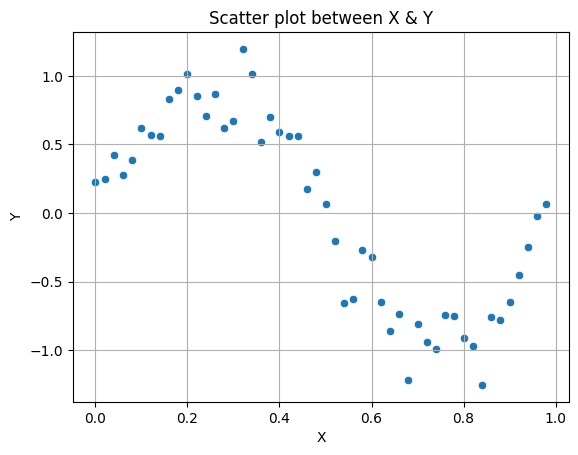

In [40]:
# Scatter plot of sine function having X and Y
sns.scatterplot(data=df1, x="x", y="y")
plt.title("Scatter plot between X & Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

In [41]:
# define the x and y variable
X=df1[["x"]]
Y=df1["y"]

In [42]:
# Define the model and fit
kernal=1 * RBF(length_scale=0.1, length_scale_bounds=(1e-2, 1e2))
model=GaussianProcessRegressor(kernel=kernal, n_restarts_optimizer=9)
model.fit(X,Y)
model.kernel_


0.565**2 * RBF(length_scale=0.0218)

In [43]:
# make the prediction
mean_pred, std_pred=model.predict(X, return_std=True)

Text(0.5, 1.0, 'Gaussian process regression on noise-free dataset')

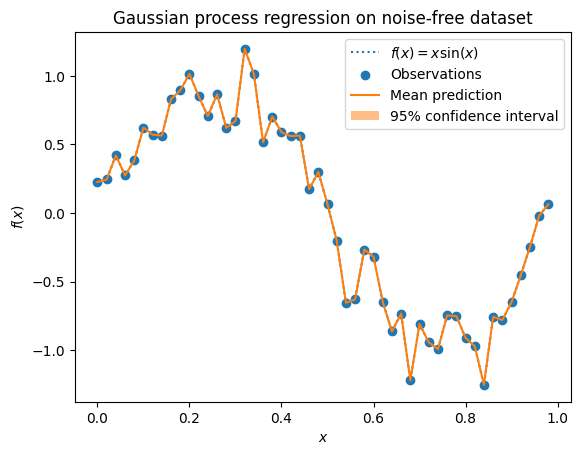

In [ ]:
# plot 
plt.Figure(figsize=(8,8))
plt.plot(X, Y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")#
plt.scatter(X, Y, label="Observations")
plt.plot(X, mean_pred, label="Mean prediction")
plt.fill_between(
    X.values.ravel(),
    mean_pred - 1.96 * std_pred,
    mean_pred + 1.96 * std_pred,
    alpha=0.5,
    label=r"95% confidence interval",)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Gaussian process regression on noise-free dataset")

In [ ]:
# Rolling mean and standard daviation 
x_rolling_mean= df1["x"].rolling(window=5).mean()
y_rolling_mean=df1["y"].rolling(window=5).mean()
y_rolling_std=df1["y"].rolling(window=5).std()

In [48]:
# Remove the null values
rolling_df1=pd.DataFrame({
    "x_mean": x_rolling_mean,
    "y_mean":y_rolling_mean,
    "y_std": y_rolling_std
})
rolling_df1.dropna().head(2)

,x_mean,y_mean,y_std
4,0.04,0.309839,0.086825
5,0.06,0.389203,0.149957


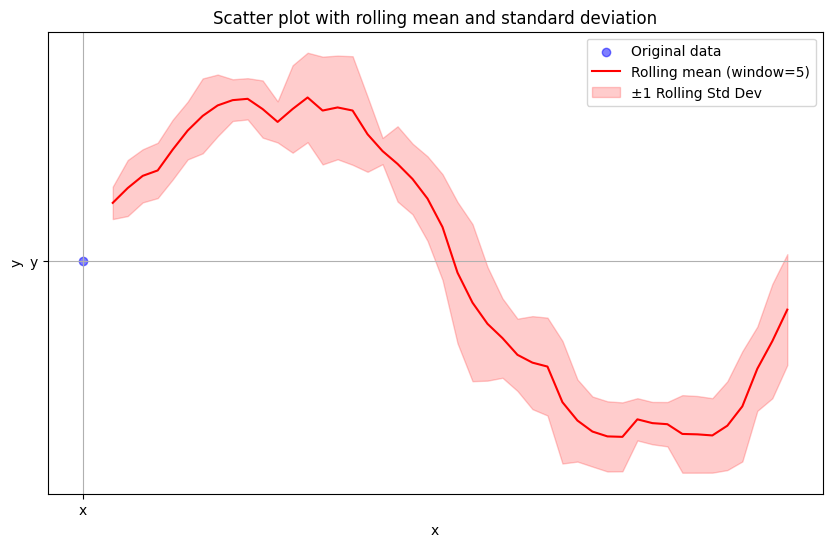

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x="x", y="y", color='blue', alpha=0.5, label='Original data')
plt.plot(x_rolling_mean, y_rolling_mean, color='red', label='Rolling mean (window=5)')
plt.fill_between(
    x_rolling_mean,
    y_rolling_mean - y_rolling_std,
    y_rolling_mean + y_rolling_std,
    color='red',
    alpha=0.2,
    label='±1 Rolling Std Dev'
)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot with rolling mean and standard deviation")
plt.legend()
plt.grid(True)
plt.show()


## **Exercise 1.2**

In [3]:
# load the dataset
df2= pd.read_csv("data_astroids.csv")
df2.head() 

,full_name,a,e,i,H,diameter,albedo,class,first_obs
0,473279 (2015 NG12),3.139,0.1201,27.52,15.80,4.583,0.146,MBA,2008-01-10
1,379452 (2010 CD114),3.097,0.1138,2.65,16.83,2.917,0.040,MBA,2005-03-11
2,469825 (2005 SG209),2.411,0.2629,24.98,17.21,1.254,0.178,MBA,2005-08-29
3,22346 Katsumatatakashi (1992 SY12),2.323,0.2105,9.83,14.47,3.910,0.241,MBA,1992-09-28
4,4980 Magomaev (1974 SP1),3.196,0.1456,1.83,12.66,16.963,0.074,MBA,1974-09-19


In [4]:
# Convert the data type
df2["class"]=df2["class"].astype("string")
df2["first_obs"]=pd.to_datetime(df2["first_obs"])

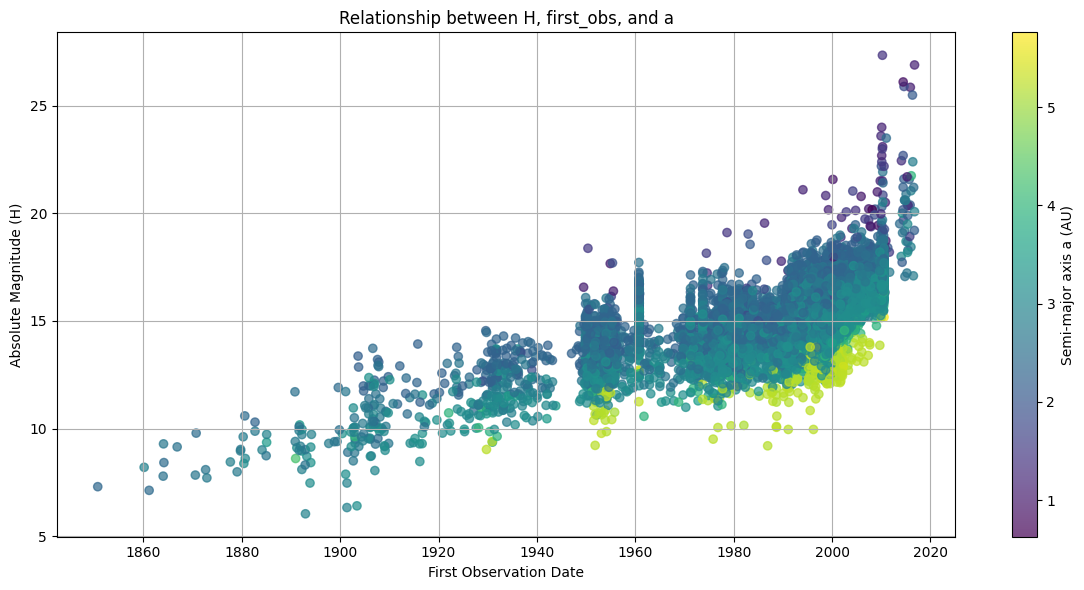

In [ ]:
#Create a scatter plot: x = first_obs, y = H, color = a
plt.figure(figsize=(12, 6))
sc = plt.scatter(df2['first_obs'], df2['H'], c=df2['a'], cmap='viridis', alpha=0.7)
plt.colorbar(sc, label='Semi-major axis a (AU)')

plt.xlabel('First Observation Date')
plt.ylabel('Absolute Magnitude (H)')
plt.title('Relationship between H, first_obs, and a')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Create quantile-based bins for 'a'
df2["a_group"] = pd.qcut(df2["a"], q=5, labels=[f"Group {i+1}" for i in range(5)])

C:\Users\Mustafa\AppData\Local\Temp\ipykernel_9416\2393881609.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df2.groupby("a_group")


C:\Users\Mustafa\AppData\Local\Temp\ipykernel_9416\1608034662.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df2.groupby("a_group")


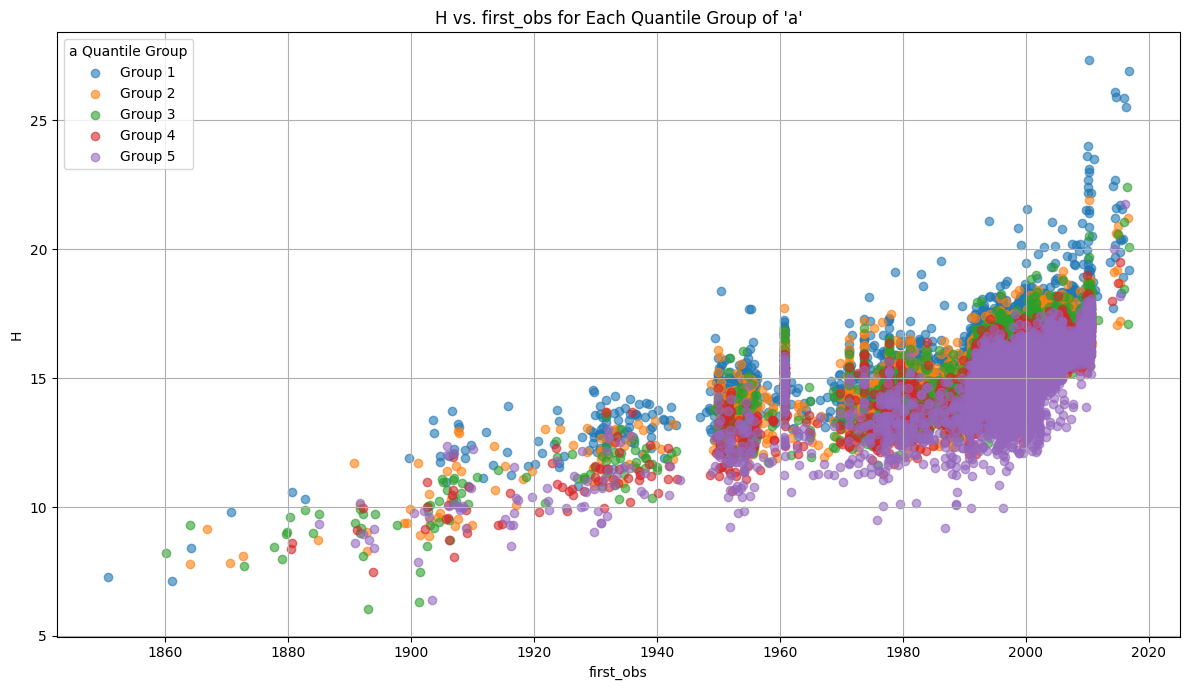

In [ ]:
# Step 2: Group by the new bins
grouped = df2.groupby("a_group")
# plot
plt.figure(figsize=(12, 7))
for name, group in grouped:
    plt.scatter(
        group["first_obs"],
        group["H"],
        label=name,
        alpha=0.6
    )

plt.xlabel("first_obs")
plt.ylabel("H")
plt.title("H vs. first_obs for Each Quantile Group of 'a'")
plt.legend(title="a Quantile Group")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Mustafa\AppData\Local\Temp\ipykernel_9416\3317715755.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in df2.groupby("a_group"):


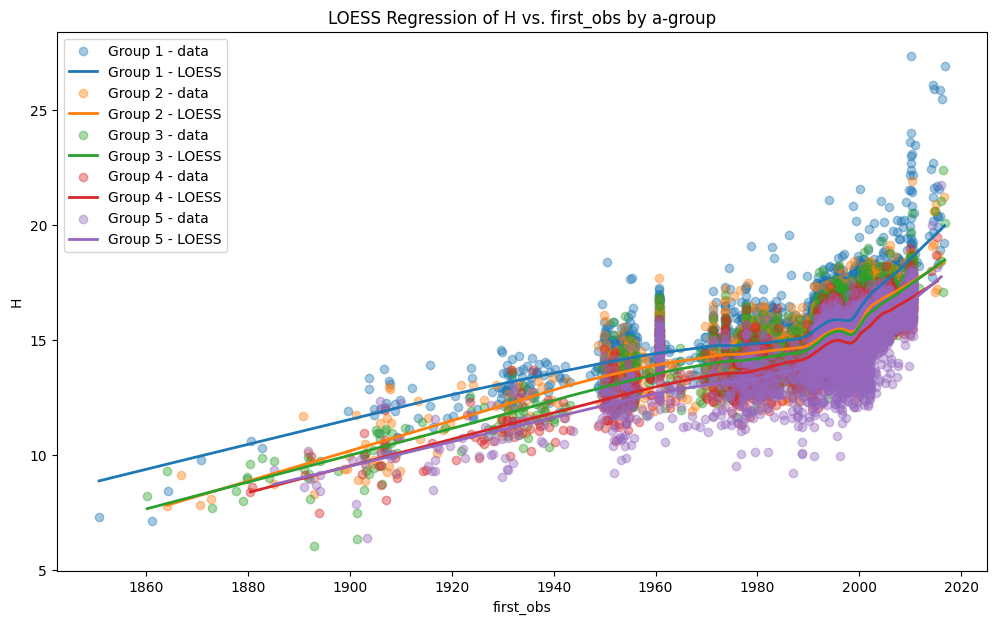

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# Set up plot
plt.figure(figsize=(12, 7))

# Loop through each group and apply LOESS
for name, group in df2.groupby("a_group"):
    # Ensure dates are numeric for LOESS
    group = group.sort_values("first_obs")

    # Apply LOESS smoothing
    smoothed = lowess(group["H"], group["first_obs"], frac=0.3)  # frac = smoothing span

    # Plot original scatter
    plt.scatter(group["first_obs"], group["H"], alpha=0.4, label=f"{name} - data")

    # Plot smoothed LOESS line
    plt.plot(pd.to_datetime(smoothed[:, 0], origin="unix"), smoothed[:, 1],
             linewidth=2, label=f"{name} - LOESS")

# Final plot details
plt.xlabel("first_obs")
plt.ylabel("H")
plt.title("LOESS Regression of H vs. first_obs by a-group")
plt.legend()
plt.show()


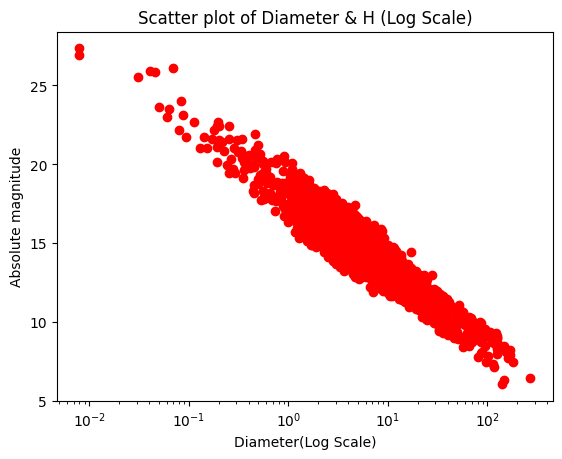

In [ ]:
#Scatter plot of Diameter & H using Log Scale
plt.Figure(figsize=(8,6))
plt.scatter(df2["diameter"], df2["H"],c="red")
plt.xscale("log")
plt.xlabel("Diameter(Log Scale)")
plt.ylabel("Absolute magnitude")
plt.title("Scatter plot of Diameter & H (Log Scale)")
plt.show()